<a href="https://colab.research.google.com/github/ADRIANVM117/data-science-portfolio/blob/main/NBA_PREDICTIVE_MODELING/NBA_STATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadicitcas y Probabilidades ü•á

| Columna            | Descripci√≥n                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `SEASON_ID`        | Identificador de la temporada (por ejemplo, '2023' para la temporada 2023-2024). |
| `TEAM_ID`          | Identificador √∫nico del equipo en la base de datos de la NBA.               |
| `TEAM_ABBREVIATION`| Abreviaci√≥n oficial del equipo (por ejemplo, 'CHI' para Chicago Bulls).     |
| `TEAM_NAME`        | Nombre completo del equipo (por ejemplo, 'Chicago Bulls').                 |
| `GAME_ID`          | Identificador √∫nico del juego en la base de datos de la NBA.               |
| `GAME_DATE`        | Fecha en la que se jug√≥ el partido, en formato `YYYY-MM-DD`.               |
| `MATCHUP`          | Indica el enfrentamiento y si el equipo jug√≥ como local ('vs.') o visitante ('@'). |
| `WL`               | Resultado del partido para el equipo (ganado: 'W', perdido: 'L').          |
| `MIN`              | Minutos totales jugados por el equipo en el partido.                       |
| `PTS`              | Puntos anotados por el equipo en el partido.                               |
| `FGM`              | Total de tiros de campo anotados.                                          |
| `FGA`              | Total de tiros de campo intentados.                                        |
| `FG_PCT`           | Porcentaje de tiros de campo anotados (`FGM / FGA`).                       |
| `FG3M`             | Total de tiros de tres puntos anotados.                                    |
| `FG3A`             | Total de tiros de tres puntos intentados.                                  |
| `FG3_PCT`          | Porcentaje de tiros de tres puntos anotados (`FG3M / FG3A`).               |
| `FTM`              | Total de tiros libres anotados.                                            |
| `FTA`              | Total de tiros libres intentados.                                          |
| `FT_PCT`           | Porcentaje de tiros libres anotados (`FTM / FTA`).                         |
| `OREB`             | Total de rebotes ofensivos.                                                |
| `DREB`             | Total de rebotes defensivos.                                               |
| `REB`              | Total de rebotes (`OREB + DREB`).                                          |
| `AST`              | Total de asistencias.                                                     |
| `STL`              | Total de robos de bal√≥n.                                                  |
| `BLK`              | Total de bloqueos.                                                        |
| `TOV`              | Total de p√©rdidas de bal√≥n.                                               |
| `PF`               | Total de faltas personales cometidas.                                      |
| `PLUS_MINUS`       | Diferencia en el marcador cuando el equipo estuvo en el campo.             |


In [ ]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Cargar el DataFrame limpio
df_limpio = pd.read_csv('/content/drive/My Drive/df_limpio.csv')
df_limpio.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


SEASON_ID     TEAM_ID TEAM_ABBREVIATION      TEAM_NAME   GAME_ID  \
0      22024  1610612737               ATL  Atlanta Hawks  22400001   
1      22024  1610612737               ATL  Atlanta Hawks  22400198   
2      22024  1610612737               ATL  Atlanta Hawks  22400185   
3      22024  1610612737               ATL  Atlanta Hawks  22400171   
4      22024  1610612737               ATL  Atlanta Hawks  22400157   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB   REB  AST  \
0  2024-11-12    ATL @ BOS  W  240  117  ...   0.538  19.0  25.0  44.0   35   
1  2024-11-09  ATL vs. CHI  L  240  113  ...   0.733  10.0  29.0  39.0   31   
2  2024-11-08    ATL @ DET  L  240  121  ...   0.783  15.0  29.0  44.0   30   
3  2024-11-06  ATL vs. NYK  W  240  121  ...   0.727  16.0  32.0  48.0   31   
4  2024-11-04  ATL vs. BOS  L  240   93  ...   0.813   8.0  35.0  43.0   23   

    STL  BLK  TOV  PF  PLUS_MINUS  
0  16.0    2   16  17         1.0  
1   8.0    5   13  19       -12.0  
2  12.0    7   17  21        -1.0  
3  12.0    4    8  14         5.0  
4   9.0    3   19  13       -30.0  

[5 rows x 28 columns]

# 1. Comprensi√≥n del Problema y Contexto
Este paso implica documentar y reflexionar sobre los datos y el objetivo. Lo dividir√≠a en varias etapas pr√°cticas:

### 1.  Definir el objetivo principal
El modelo est√° dise√±ado para predecir si un equipo gana (W) o pierde (L) un partido basado en las estad√≠sticas disponibles.

- <B>"El objetivo es predecir el resultado de un partido (ganado o perdido) usando estad√≠sticas del equipo como puntos anotados, porcentajes de tiro y asistencias." </B>

### 2. Revisar el significado de las variables
Ya se defini√≥ el significado de las columnas, pero ahora analizaremos c√≥mo podr√≠an impactar en el objetivo:

- Variables directas: PTS (Puntos anotados)
- PLUS_MINUS (Diferencia de puntos)
- FG_PCT (Porcentaje de tiro de campo).

- <B>Variables contextuales: </B> TEAM_ABBREVIATION, MATCHUP, GAME_DATE.
- <B>Variables posiblemente redundantes: </B> FGM (Tiros de campo anotados) podr√≠a correlacionarse fuertemente con PTS.
Acci√≥n:

- <B> Mayor PTS, REB, y AST deber√≠an correlacionarse con victorias (W).
Variables como PLUS_MINUS son indicadores fuertes porque reflejan el rendimiento global del equipo. </B>

### 3. Evaluar la distribuci√≥n de la variable objetivo (WL)
Antes de avanzar, es crucial entender si los datos est√°n balanceados. Un desequilibrio en clases (por ejemplo, 80% victorias y 20% derrotas) podr√≠a afectar el rendimiento del modelo.

Acci√≥n:
Contar el n√∫mero total de W y L para calcular la proporci√≥n.
Documentar el resultado e identificar si ser√° necesario aplicar t√©cnicas como sobremuestreo o ajuste de pesos en el modelo.
Ejemplo de resultado:


1-  Identificar el tipo de datos y partici√≥n
Analizar c√≥mo se distribuyen los datos:

- N√∫mero de partidos por temporada: ¬øHay datos consistentes para cada temporada o equipo?
- Proporci√≥n por equipo: ¬øAlgunos equipos est√°n sobrerrepresentados?
Diferencia entre partidos locales y visitantes: Usar la variable MATCHUP para verificar si hay patrones entre estos grupos.

Acci√≥n: Generar tablas o res√∫menes b√°sicos que muestren:

- Cantidad de partidos por temporada.
- Cantidad de partidos por equipo.
- Distribuci√≥n de partidos locales vs visitantes.

2-  Contextualizar el an√°lisis
Considerar factores externos que puedan influir en los datos:

- Calendario: Equipos pueden tener mejores rachas al inicio o final de temporada.
- Equipo contrario: Algunos equipos fuertes podr√≠an sesgar los resultados.
Esto ayuda a decidir si se incluir√°n nuevas caracter√≠sticas derivadas, como el rendimiento hist√≥rico del oponente (TEAM_OPP_AVG).


"El objetivo es un problema de clasificaci√≥n binaria (WL)."
"La variable PLUS_MINUS es un fuerte indicador del resultado."
"Los datos est√°n distribuidos 60% victorias y 40% derrotas."
"Se analizar√°n diferencias entre partidos locales y visitantes como hip√≥tesis inicial."


## An√°lisis de la Distribuci√≥n de WL:
### OBJETIVO

Revisar la distribuci√≥n de la variable WL (victoria o derrota) para verificar si est√° balanceada en los datos. Esto es importante para detectar posibles problemas de sesgo que puedan afectar el rendimiento del modelo.

Pasos a seguir:

- Contar las frecuencias absolutas de cada clase (W y L).
- Calcular las proporciones de W y L para entender su distribuci√≥n.
- Visualizar la distribuci√≥n de WL con gr√°ficos de barras o circulares.

Frecuencias de cada clase:
WL
W    53302
L    53170
        13
O        2
T        1
Name: count, dtype: int64

Proporciones de cada clase (%):
WL
W    50.054466
L    49.930509
      0.012208
O     0.001878
T     0.000939
Name: proportion, dtype: float64



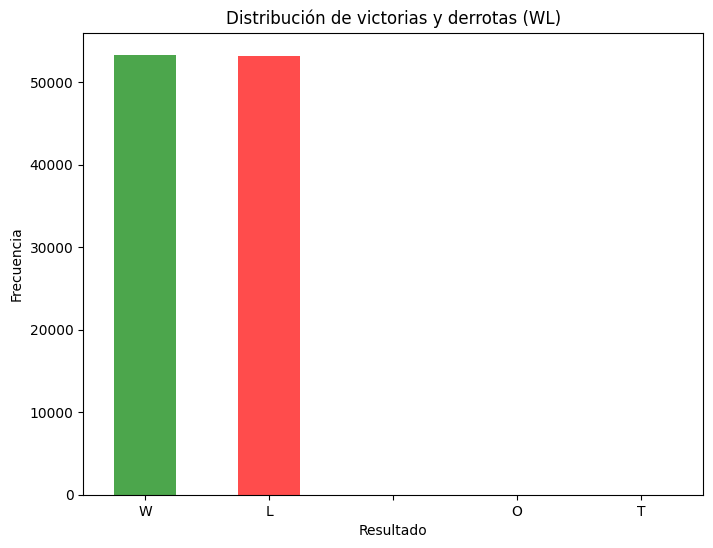

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que df_limpio es el DataFrame ya limpio
def revisar_distribucion_WL(df):
    """
    Revisa la distribuci√≥n de la columna 'WL' para identificar si las clases est√°n balanceadas.
    Muestra las frecuencias absolutas, las proporciones y un gr√°fico de barras.

    Args:
    df (pd.DataFrame): DataFrame que contiene la columna 'WL' con resultados de partidos.

    Returns:
    None: Imprime las frecuencias y proporciones, y muestra el gr√°fico.
    """
    # Contar las frecuencias de cada clase ('W' y 'L')
    conteo = df['WL'].value_counts()

    # Calcular las proporciones de cada clase
    proporciones = df['WL'].value_counts(normalize=True) * 100

    # Imprimir resultados
    print(f"Frecuencias de cada clase:\n{conteo}\n")
    print(f"Proporciones de cada clase (%):\n{proporciones}\n")

    # Graficar la distribuci√≥n
    plt.figure(figsize=(8, 6))
    conteo.plot(kind='bar', color=['green', 'red'], alpha=0.7)
    plt.title('Distribuci√≥n de victorias y derrotas (WL)')
    plt.xlabel('Resultado')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=0)
    plt.show()

# Llamar la funci√≥n con el DataFrame df_limpio
revisar_distribucion_WL(df_limpio)


Frecuencias de cada clase:
WL
W    53302
L    53170
        13
O        2
T        1
Name: count, dtype: int64

Proporciones de cada clase (%):
WL
W    50.054466
L    49.930509
      0.012208
O     0.001878
T     0.000939
Name: proportion, dtype: float64


Comentario sobre la distribuci√≥n:
Frecuencias de cada clase:
WL
W    53302
L    53170
        13
O        2
T        1
Name: count, dtype: int64

Proporciones de cada clase (%):
WL
W    50.054466
L    49.930509
      0.012208
O     0.001878
T     0.000939
Name: proportion, dtype: float64

Distribuci√≥n desbalanceada.
Una distribuci√≥n desbalanceada puede causar sesgo en el modelo, favoreciendo la clase mayoritaria. Se podr√≠an considerar t√©cnicas de muestreo o ponderaci√≥n.


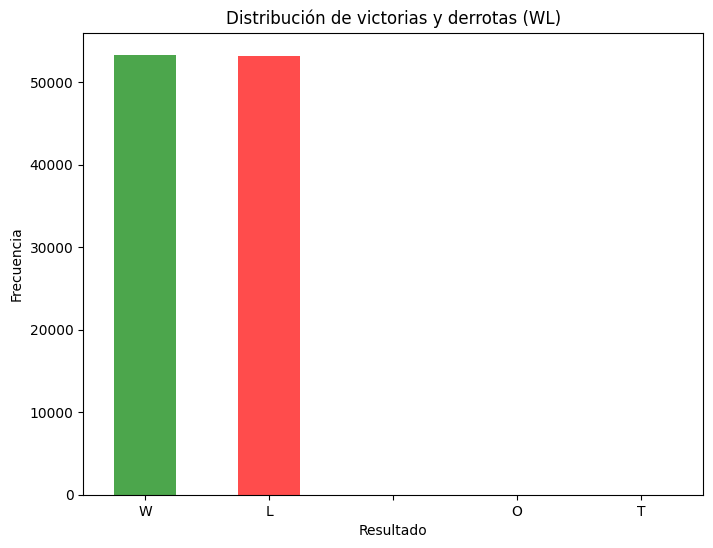

In [ ]:
def analizar_distribucion(frecuencias, proporciones):
    """
    Analiza la distribuci√≥n de clases en una columna categ√≥rica y ofrece un comentario sobre su
    impacto potencial en un modelo de machine learning.

    Args:
    frecuencias (pd.Series): Frecuencias absolutas de cada clase en la columna.
    proporciones (pd.Series): Proporciones (en porcentaje) de cada clase en la columna.

    Returns:
    str: Comentario sobre la distribuci√≥n y el impacto en el modelo.
    """

    # Comprobamos si la distribuci√≥n es equilibrada
    if abs(proporciones.max() - proporciones.min()) < 0.1:
        distribucion = "Distribuci√≥n equilibrada."
        impacto = "La distribuci√≥n casi equilibrada no deber√≠a causar sesgo en el modelo, ya que las clases est√°n bien representadas."
    else:
        distribucion = "Distribuci√≥n desbalanceada."
        impacto = "Una distribuci√≥n desbalanceada puede causar sesgo en el modelo, favoreciendo la clase mayoritaria. Se podr√≠an considerar t√©cnicas de muestreo o ponderaci√≥n."

    # Generamos el comentario final
    comentario = f"Frecuencias de cada clase:\n{frecuencias}\n\nProporciones de cada clase (%):\n{proporciones}\n\n{distribucion}\n{impacto}"

    return comentario

def revisar_distribucion_WL(df):
    """
    Revisa la distribuci√≥n de la columna 'WL' para identificar si las clases est√°n balanceadas.
    Muestra las frecuencias absolutas, las proporciones y un gr√°fico de barras.

    Args:
    df (pd.DataFrame): DataFrame que contiene la columna 'WL' con resultados de partidos.

    Returns:
    None: Imprime las frecuencias y proporciones, y muestra el gr√°fico.
    """
    # Contar las frecuencias de cada clase ('W' y 'L')
    conteo = df['WL'].value_counts()

    # Calcular las proporciones de cada clase
    proporciones = df['WL'].value_counts(normalize=True) * 100

    # Imprimir resultados
    print(f"Frecuencias de cada clase:\n{conteo}\n")
    print(f"Proporciones de cada clase (%):\n{proporciones}\n")

    # An√°lisis de distribuci√≥n
    comentario = analizar_distribucion(conteo, proporciones)
    print("\nComentario sobre la distribuci√≥n:")
    print(comentario)

    # Graficar la distribuci√≥n
    plt.figure(figsize=(8, 6))
    conteo.plot(kind='bar', color=['green', 'red'], alpha=0.7)
    plt.title('Distribuci√≥n de victorias y derrotas (WL)')
    plt.xlabel('Resultado')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=0)
    plt.show()

# Llamar la funci√≥n con el DataFrame df_limpio
revisar_distribucion_WL(df_limpio)



2. Estad√≠sticas Descriptivas
Calcular estad√≠sticas clave para comprender cada variable:

Variables num√©ricas:
Media, mediana, moda, varianza, desviaci√≥n est√°ndar.
Percentiles (25%, 50%, 75%) para identificar distribuci√≥n.
Valores at√≠picos (outliers) con base en el rango intercuartil (IQR).
Variables categ√≥ricas (WL, TEAM_ABBREVIATION):
Frecuencias relativas y absolutas.
Distribuci√≥n de clases para verificar balance.
¬øPor qu√©? Esto da un panorama general del comportamiento de las variables y destaca posibles problemas, como variabilidad alta o columnas no √∫tiles.



In [ ]:
import pandas as pd
import numpy as np

def calcular_estadisticas_descriptivas(df):
    """
    Calcula las estad√≠sticas descriptivas de las variables num√©ricas y categ√≥ricas del DataFrame.

    Args:
    df (pd.DataFrame): DataFrame que contiene los datos limpios.

    Returns:
    None: Imprime las estad√≠sticas clave de las variables num√©ricas y categ√≥ricas.
    """
    # Estad√≠sticas para variables num√©ricas
    print("Estad√≠sticas Descriptivas de Variables Num√©ricas:")
    num√©ricas = df.select_dtypes(include=[np.number])  # Seleccionar solo las variables num√©ricas
    estadisticas_numericas = num√©ricas.describe().T  # Transponer para tener las variables como filas
    estadisticas_numericas['moda'] = num√©ricas.mode().iloc[0]  # Moda

    print(estadisticas_numericas[['mean', '50%', 'std', 'min', 'max', '25%', '75%', 'moda']])

    # Detectar valores at√≠picos (outliers) usando el Rango Intercuart√≠lico (IQR)
    print("\nDetecci√≥n de valores at√≠picos (outliers) en variables num√©ricas:")
    IQR = num√©ricas.quantile(0.75) - num√©ricas.quantile(0.25)
    limites_inferiores = num√©ricas.quantile(0.25) - 1.5 * IQR
    limites_superiores = num√©ricas.quantile(0.75) + 1.5 * IQR

    outliers = ((num√©ricas < limites_inferiores) | (num√©ricas > limites_superiores))
    print("Valores at√≠picos detectados:")
    print(outliers.sum())

    # Estad√≠sticas para variables categ√≥ricas
    print("\nEstad√≠sticas Descriptivas de Variables Categ√≥ricas:")
    categoricas = df.select_dtypes(include=[object])  # Seleccionar solo las variables categ√≥ricas

    for columna in categoricas.columns:
        print(f"\nFrecuencias de la variable {columna}:")
        print(categoricas[columna].value_counts())  # Frecuencias absolutas
        print(f"\nProporciones de la variable {columna}:")
        print(categoricas[columna].value_counts(normalize=True) * 100)  # Frecuencias relativas

    # Distribuci√≥n balanceada para variables categ√≥ricas clave como 'WL'
    print("\nDistribuci√≥n balanceada de la variable WL:")
    conteo_WL = df['WL'].value_counts()
    proporciones_WL = df['WL'].value_counts(normalize=True) * 100
    print(f"Frecuencias: \n{conteo_WL}")
    print(f"Proporciones (%): \n{proporciones_WL}")

    if abs(proporciones_WL.max() - proporciones_WL.min()) < 0.1:
        print("\nLa distribuci√≥n de la variable 'WL' est√° equilibrada.")
    else:
        print("\nLa distribuci√≥n de la variable 'WL' est√° desequilibrada.")

# Llamar la funci√≥n con el DataFrame df_limpio
calcular_estadisticas_descriptivas(df_limpio)


Estad√≠sticas Descriptivas de Variables Num√©ricas:
                    mean           50%           std           min  \
SEASON_ID   2.287008e+04  2.200500e+04  5.226508e+03  1.200300e+04   
TEAM_ID     1.610613e+09  1.610613e+09  8.569652e+00  1.610613e+09   
GAME_ID     6.111188e+07  2.200072e+07  2.289199e+08  1.030000e+07   
MIN         2.403437e+02  2.400000e+02  1.247569e+01 -1.000000e+00   
PTS         1.021962e+02  1.020000e+02  1.406874e+01  0.000000e+00   
FGM         3.835176e+01  3.800000e+01  6.043963e+00  0.000000e+00   
FGA         8.345197e+01  8.300000e+01  8.869995e+00  0.000000e+00   
FG_PCT      4.601273e-01  4.590000e-01  5.853765e-02  0.000000e+00   
FG3M        6.357862e+00  6.000000e+00  4.501192e+00  0.000000e+00   
FG3A        1.805297e+01  1.700000e+01  1.090101e+01  0.000000e+00   
FG3_PCT     3.392690e-01  3.392690e-01  1.516140e-01  0.000000e+00   
FTM         1.913488e+01  1.900000e+01  6.624713e+00  0.000000e+00   
FTA         2.531265e+01  2.500000e+01

Estad√≠sticas Descriptivas de Variables Num√©ricas:

                    mean           50%           std          IQR
SEASON_ID   2.287008e+04  2.200500e+04  5.226508e+03       22.000
TEAM_ID     1.610613e+09  1.610613e+09  8.569652e+00       15.000
GAME_ID     6.111188e+07  2.200072e+07  2.289199e+08  8299496.500
MIN         2.403437e+02  2.400000e+02  1.247569e+01        0.000
PTS         1.021962e+02  1.020000e+02  1.406874e+01       18.000
FGM         3.835176e+01  3.800000e+01  6.043963e+00        8.000
FGA         8.345197e+01  8.300000e+01  8.869995e+00       11.000
FG_PCT      4.601273e-01  4.590000e-01  5.853765e-02        0.080
FG3M        6.357862e+00  6.000000e+00  4.501192e+00        6.000
FG3A        1.805297e+01  1.700000e+01  1.090101e+01       15.000
FG3_PCT     3.392690e-01  3.392690e-01  1.516140e-01        0.179
FTM         1.913488e+01  1.900000e+01  6.624713e+00        9.000
FTA         2.531265e+01  2.500000e+01  8.211831e+00       12.000
FT_PCT      7.564927e-0

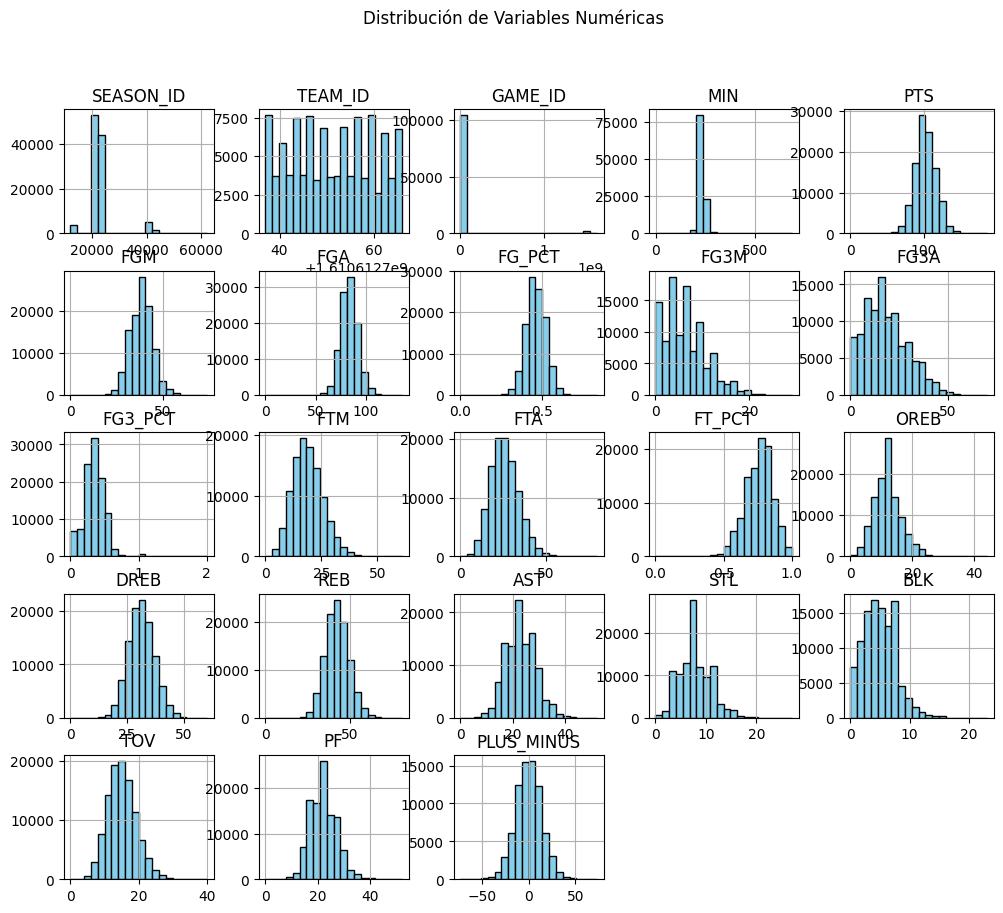

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Funci√≥n para calcular y responder preguntas sobre estad√≠sticas descriptivas de variables num√©ricas
def analisis_variables_numericas(df):
    """
    Responde a preguntas clave sobre variables num√©ricas utilizando estad√≠sticas descriptivas y gr√°ficos.
    """
    # Calcular estad√≠sticas b√°sicas de las variables num√©ricas
    print("Estad√≠sticas Descriptivas de Variables Num√©ricas:\n")
    estadisticas = df.describe().T
    estadisticas['IQR'] = estadisticas['75%'] - estadisticas['25%']  # Rango Intercuartil (IQR)

    # Mostrar las estad√≠sticas
    print(estadisticas[['mean', '50%', 'std', 'IQR']])

    # 1. Media, Mediana, Moda, Desviaci√≥n Est√°ndar
    print("\n1. Preguntas sobre Variables Num√©ricas:")

    for col in df.select_dtypes(include='number').columns:
        print(f"\n- Variable: {col}")
        media = df[col].mean()
        mediana = df[col].median()
        moda = df[col].mode()[0]
        desviacion = df[col].std()

        print(f"  Media: {media}")
        print(f"  Mediana: {mediana}")
        print(f"  Moda: {moda}")
        print(f"  Desviaci√≥n Est√°ndar: {desviacion}")

        # Pregunta: ¬øExisten diferencias entre la media y la mediana?
        if abs(media - mediana) > 0.1 * media:
            print("  La media y la mediana difieren significativamente, indicando posible sesgo en la distribuci√≥n.")
        else:
            print("  La media y la mediana son similares, lo que indica una distribuci√≥n m√°s sim√©trica.")

        # Pregunta: ¬øHay alguna variable con una desviaci√≥n est√°ndar muy alta?
        if desviacion > df[col].mean():
            print(f"  La desviaci√≥n est√°ndar es alta para la variable {col}, lo que indica gran dispersi√≥n en los datos.")

    # 2. Percentiles
    print("\n2. Percentiles:")
    for col in df.select_dtypes(include='number').columns:
        print(f"\n- Variable: {col}")
        percentiles = df[col].quantile([0.25, 0.5, 0.75])
        print(f"  Percentiles (25%, 50%, 75%): {percentiles.to_dict()}")

        # Pregunta: ¬øExisten saltos grandes entre los percentiles?
        if percentiles[0.75] - percentiles[0.25] > 2 * (percentiles[0.5] - percentiles[0.25]):
            print("  Existe un salto significativo entre los percentiles, lo que podr√≠a indicar subgrupos o variabilidad inesperada.")

    # 3. Valores At√≠picos (Outliers)
    print("\n3. Valores At√≠picos (Outliers):")
    for col in df.select_dtypes(include='number').columns:
        print(f"\n- Variable: {col}")

        # Calcular los outliers basados en el IQR
        Q1 = estadisticas.at[col, '25%']
        Q3 = estadisticas.at[col, '75%']
        IQR = estadisticas.at[col, 'IQR']

        # Identificar los outliers
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
        num_outliers = outliers.shape[0]

        print(f"  N√∫mero de outliers: {num_outliers}")

        # Pregunta: ¬øQu√© variables tienen valores at√≠picos?
        if num_outliers > 0:
            print(f"  La variable {col} tiene valores at√≠picos que podr√≠an necesitar tratamiento.")

        # Pregunta: ¬øLos outliers son errores en los datos o son puntos v√°lidos?
        if num_outliers > 0:
            print(f"  Los valores at√≠picos en {col} deben ser investigados: ¬øson errores o puntos v√°lidos?")

    # Graficar histogramas para visualizar la distribuci√≥n
    print("\nDistribuci√≥n de las variables num√©ricas (Histogramas):")
    df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
    plt.suptitle('Distribuci√≥n de Variables Num√©ricas')
    plt.show()

# Llamar la funci√≥n con el DataFrame limpio
analisis_variables_numericas(df_limpio)


### <b> Preguntas de seguimiento </b>

1- ¬øQu√© tan frecuentemente ocurren los valores extremos de PLUS_MINUS? ¬øEst√°n distribuidos uniformemente o son casos aislados?

2- ¬øHay alg√∫n patr√≥n en los equipos o situaciones espec√≠ficas en las que se observan estos valores extremos (por ejemplo, partidos ganados o perdidos por grandes m√°rgenes)?

3- ¬øDeber√≠amos realizar una transformaci√≥n en PLUS_MINUS para hacerla m√°s sim√©trica y reducir su impacto en el modelo?

Total de valores extremos encontrados: 842
Frecuencia de los valores extremos:
PLUS_MINUS
 39.0    66
-39.0    62
 37.0    59
-37.0    55
 38.0    55
         ..
-55.0     1
 44.2     1
 69.0     1
 39.6     1
 61.0     1
Name: count, Length: 64, dtype: int64



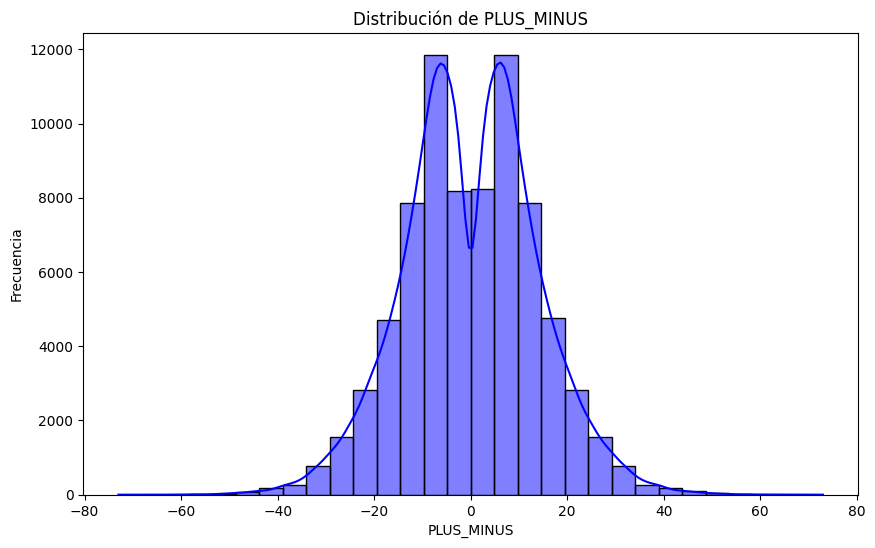

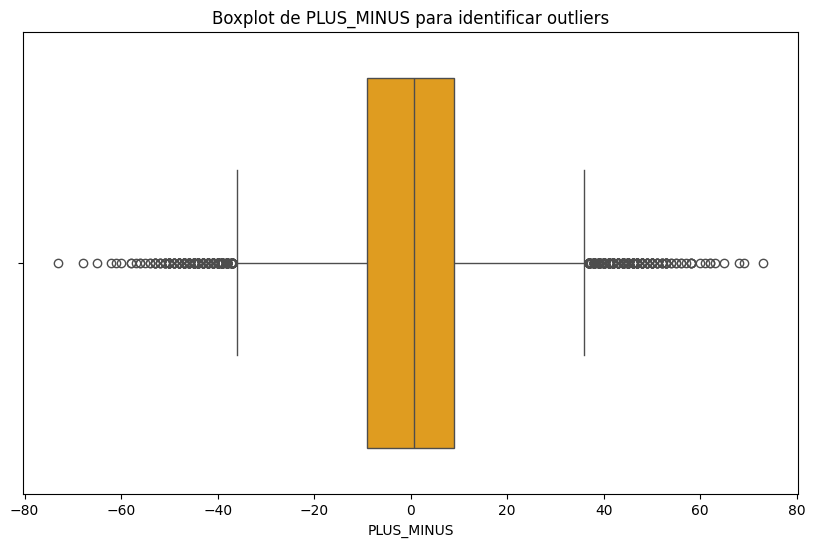

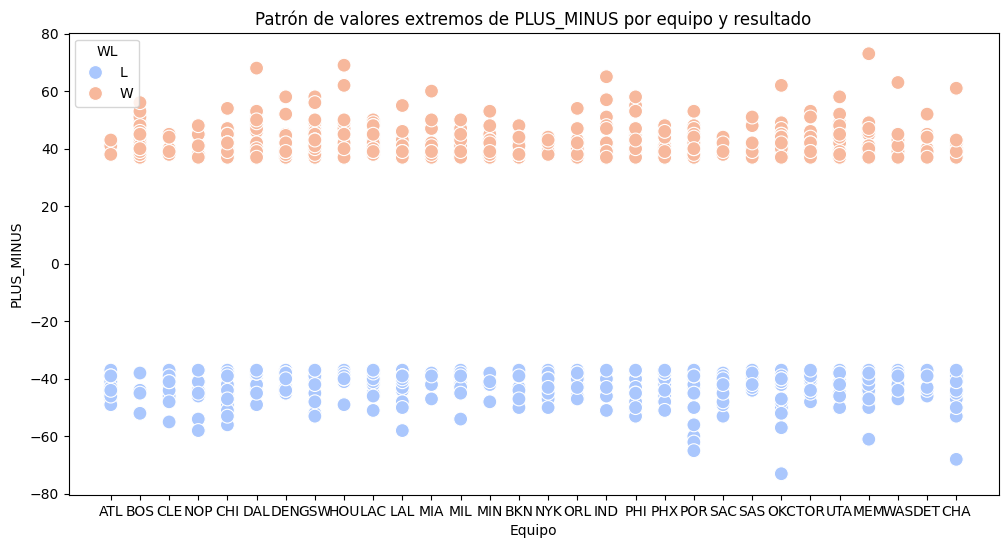

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


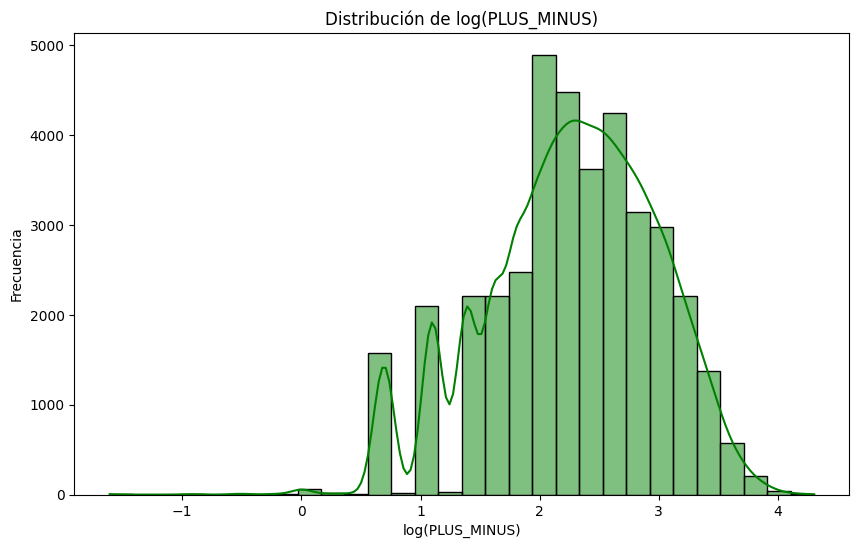

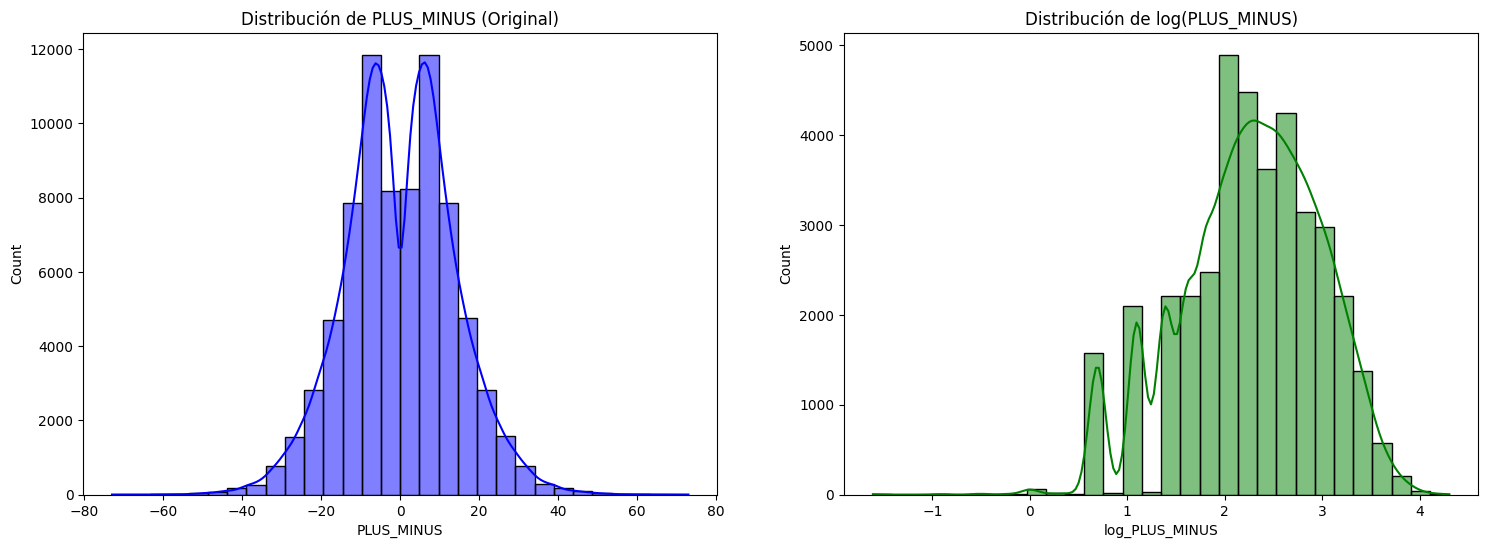

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analizar_plus_minus(df):
    """
    Realiza un an√°lisis detallado de la variable 'PLUS_MINUS' respondiendo a preguntas clave:
    - Frecuencia de valores extremos
    - Distribuci√≥n de los valores
    - Posibles patrones con el resultado y equipo
    - Transformaci√≥n para simetr√≠a

    Args:
    df (pd.DataFrame): DataFrame que contiene la columna 'PLUS_MINUS'.

    Returns:
    None: Muestra gr√°ficos y estad√≠sticas.
    """

    # 1. Identificaci√≥n de valores extremos usando el IQR
    Q1 = df['PLUS_MINUS'].quantile(0.25)
    Q3 = df['PLUS_MINUS'].quantile(0.75)
    IQR = Q3 - Q1
    limites_superior = Q3 + 1.5 * IQR
    limites_inferior = Q1 - 1.5 * IQR

    # Filtrar los valores extremos
    outliers = df[(df['PLUS_MINUS'] > limites_superior) | (df['PLUS_MINUS'] < limites_inferior)]

    print(f"Total de valores extremos encontrados: {len(outliers)}")
    print(f"Frecuencia de los valores extremos:\n{outliers['PLUS_MINUS'].value_counts()}\n")

    # 2. Visualizaci√≥n de la distribuci√≥n de PLUS_MINUS
    plt.figure(figsize=(10, 6))
    sns.histplot(df['PLUS_MINUS'], kde=True, bins=30, color='blue')
    plt.title('Distribuci√≥n de PLUS_MINUS')
    plt.xlabel('PLUS_MINUS')
    plt.ylabel('Frecuencia')
    plt.show()

    # 3. Identificaci√≥n de los valores extremos: ¬øEst√°n distribuidos uniformemente o son casos aislados?
    # Graficar un boxplot para visualizar los outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['PLUS_MINUS'], color='orange')
    plt.title('Boxplot de PLUS_MINUS para identificar outliers')
    plt.xlabel('PLUS_MINUS')
    plt.show()

    # 4. Analizar si hay alg√∫n patr√≥n en los equipos o resultados de los partidos con valores extremos
    outliers = df[(df['PLUS_MINUS'] > limites_superior) | (df['PLUS_MINUS'] < limites_inferior)]

    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=outliers['TEAM_ABBREVIATION'], y=outliers['PLUS_MINUS'], hue=outliers['WL'], palette='coolwarm', s=100)
    plt.title('Patr√≥n de valores extremos de PLUS_MINUS por equipo y resultado')
    plt.xlabel('Equipo')
    plt.ylabel('PLUS_MINUS')
    plt.show()

    # 5. Probar transformaci√≥n logar√≠tmica para hacer PLUS_MINUS m√°s sim√©trica
    df['log_PLUS_MINUS'] = np.log1p(df['PLUS_MINUS'])  # log1p maneja valores <= 0
    plt.figure(figsize=(10, 6))
    sns.histplot(df['log_PLUS_MINUS'], kde=True, bins=30, color='green')
    plt.title('Distribuci√≥n de log(PLUS_MINUS)')
    plt.xlabel('log(PLUS_MINUS)')
    plt.ylabel('Frecuencia')
    plt.show()

    # Comparar distribuci√≥n antes y despu√©s de la transformaci√≥n
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    sns.histplot(df['PLUS_MINUS'], kde=True, bins=30, color='blue', ax=axes[0])
    axes[0].set_title('Distribuci√≥n de PLUS_MINUS (Original)')
    sns.histplot(df['log_PLUS_MINUS'], kde=True, bins=30, color='green', ax=axes[1])
    axes[1].set_title('Distribuci√≥n de log(PLUS_MINUS)')

    plt.show()

# Llamar la funci√≥n con el DataFrame df_limpio
analizar_plus_minus(df_limpio)


### ¬øcontribuye Log(PLUS_MINUS)?

Media de log(PLUS_MINUS): 2.27
Moda de log(PLUS_MINUS): 2.08
Desviaci√≥n est√°ndar de log(PLUS_MINUS): 0.71
Prueba Shapiro-Wilk para log(PLUS_MINUS): p = 1.7997008686614708e-53


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 38416.
  res = hypotest_fun_out(*samples, **kwds)


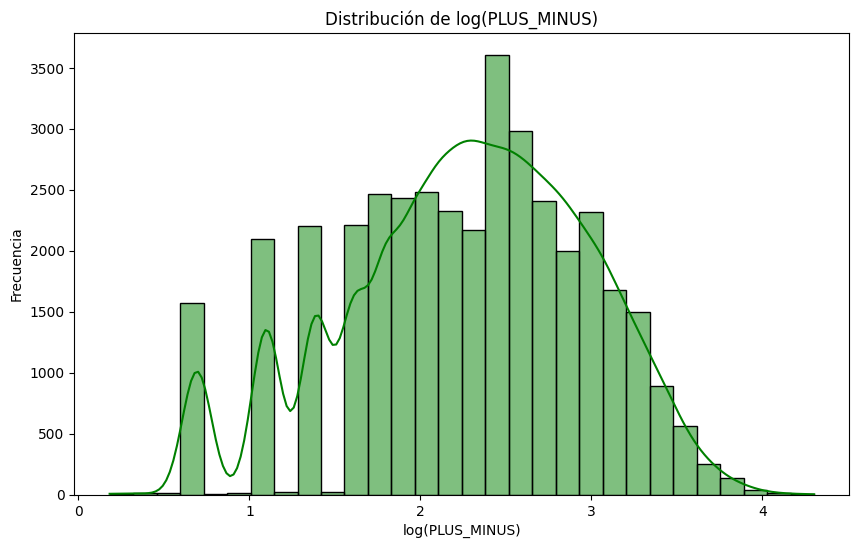

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def analizar_plus_minus(df):
    """
    Realiza el an√°lisis de la variable 'PLUS_MINUS' y de su distribuci√≥n logar√≠tmica.
    Calcula y muestra estad√≠sticas de la distribuci√≥n log(PLUS_MINUS), incluyendo
    la media, moda, desviaci√≥n est√°ndar y realiza la prueba de Shapiro-Wilk.

    Args:
    df (pd.DataFrame): DataFrame que contiene la columna 'PLUS_MINUS'.

    Returns:
    None: Muestra las estad√≠sticas y resultados de la prueba de normalidad.
    """

    # Filtrar valores de 'PLUS_MINUS' que sean mayores que 0 antes de aplicar la transformaci√≥n logar√≠tmica
    df_filtrado = df[df['PLUS_MINUS'] > 0].copy()  # Usamos .copy() para evitar el SettingWithCopyWarning

    # 1. Aplicar la transformaci√≥n logar√≠tmica
    df_filtrado.loc[:, 'log_PLUS_MINUS'] = np.log1p(df_filtrado['PLUS_MINUS'])  # Usar .loc[] para modificar

    # 2. C√°lculo de la media, moda y desviaci√≥n est√°ndar de log(PLUS_MINUS)
    media_log = df_filtrado['log_PLUS_MINUS'].mean()
    moda_log = df_filtrado['log_PLUS_MINUS'].mode()[0]  # `.mode()` devuelve una Serie, tomamos el primer valor
    desviacion_log = df_filtrado['log_PLUS_MINUS'].std()

    # Mostrar las estad√≠sticas
    print(f"Media de log(PLUS_MINUS): {media_log:.2f}")
    print(f"Moda de log(PLUS_MINUS): {moda_log:.2f}")
    print(f"Desviaci√≥n est√°ndar de log(PLUS_MINUS): {desviacion_log:.2f}")

    # 3. Prueba de normalidad: Shapiro-Wilk para log(PLUS_MINUS)
    stat_log, p_log = stats.shapiro(df_filtrado['log_PLUS_MINUS'].dropna())
    print(f"Prueba Shapiro-Wilk para log(PLUS_MINUS): p = {p_log}")

    # 4. Visualizaci√≥n de la distribuci√≥n de log(PLUS_MINUS)
    plt.figure(figsize=(10, 6))
    sns.histplot(df_filtrado['log_PLUS_MINUS'], kde=True, bins=30, color='green')
    plt.title('Distribuci√≥n de log(PLUS_MINUS)')
    plt.xlabel('log(PLUS_MINUS)')
    plt.ylabel('Frecuencia')
    plt.show()

# Llamar la funci√≥n con el DataFrame df_limpio
analizar_plus_minus(df_limpio)



---

# **An√°lisis de Distribuciones de las Variables**

El objetivo de esta fase es entender c√≥mo se distribuyen las variables de nuestro dataset. Con esta informaci√≥n, podemos determinar si necesitamos realizar alguna transformaci√≥n (como una transformaci√≥n logar√≠tmica o normalizaci√≥n) para mejorar el desempe√±o del modelo de predicci√≥n.

#### **Pasos a seguir:**

1. **Visualizaci√≥n de la distribuci√≥n de variables num√©ricas:**
   - **¬øQu√© se busca?**  
     Se busca observar c√≥mo se distribuyen las variables num√©ricas del conjunto de datos. En particular, se analizar√°n las variables como `PTS`, `REB`, `AST`, y `PLUS_MINUS` para identificar si siguen una distribuci√≥n normal o si tienen sesgo.
     
   - **M√©todos:**
     - **Histogramas**: Muestran la frecuencia de los valores en diferentes intervalos, lo que permite observar si la distribuci√≥n es normal, sesgada o tiene m√∫ltiples picos.
     - **Curvas de densidad (KDE)**: Complementan a los histogramas al mostrar una curva suave que representa la densidad de probabilidad de los valores.

2. **Detecci√≥n de valores at√≠picos (outliers):**
   - **¬øQu√© se busca?**  
     Identificar si existen valores at√≠picos en las variables `PLUS_MINUS`, `PTS`, y `REB`, que podr√≠an influir en los resultados del modelo. Los outliers son puntos de datos que est√°n muy alejados de la mayor√≠a de los otros puntos.
     
   - **M√©todos:**
     - **Boxplots**: Este gr√°fico muestra la mediana, cuartiles y valores at√≠picos (outliers) de una variable. Un boxplot ayudar√° a detectar estos valores fuera del rango esperado.

3. **An√°lisis de variables categ√≥ricas:**
   - **¬øQu√© se busca?**  
     Ver c√≥mo se distribuyen las categor√≠as en las variables como `WL` (si gan√≥ o perdi√≥ el partido) y `MATCHUP` (enfrentamiento del equipo). Es importante entender la frecuencia de las victorias, derrotas y los enfrentamientos para interpretar correctamente los resultados.
     
   - **M√©todos:**
     - **Gr√°ficos de barras**: Se utilizar√°n gr√°ficos de barras para mostrar la frecuencia de cada categor√≠a en las variables categ√≥ricas. Esto ayudar√° a entender c√≥mo se distribuyen las victorias y derrotas (`WL`) y los enfrentamientos (`MATCHUP`).

4. **¬øPor qu√© es importante este an√°lisis?**
   - **Identificaci√≥n de distribuciones sesgadas**: Si algunas variables presentan distribuciones muy sesgadas (como una distribuci√≥n log-normal o sesgo a la derecha), podr√≠amos necesitar aplicar transformaciones logar√≠tmicas o t√©cnicas de normalizaci√≥n.
   - **Impacto de los valores at√≠picos**: Los valores at√≠picos pueden distorsionar el rendimiento de los modelos, especialmente los modelos basados en distancias como KNN o los modelos de regresi√≥n. Detectar estos outliers es crucial.
   - **Selecci√≥n de variables relevantes**: Un an√°lisis adecuado de las variables categ√≥ricas y su distribuci√≥n permite asegurarse de que las variables sean representativas para la predicci√≥n, y ayudar√° a tomar decisiones sobre cu√°les son m√°s relevantes para el modelo.

---

### **M√©todos y Visualizaci√≥n**

1. **Histogramas y KDE**
   - **Objetivo**: Identificar la forma de la distribuci√≥n de las variables num√©ricas.
   - **M√©todo**: Crear histogramas para cada variable num√©rica y superponer una curva de densidad (KDE) para visualizar la distribuci√≥n.
   - **Interpretaci√≥n**: Si la distribuci√≥n es normal, se podr√≠a usar el modelo tal cual. Si es asim√©trica, es posible que se necesiten transformaciones.

2. **Boxplots**
   - **Objetivo**: Detectar posibles outliers en las variables num√©ricas.
   - **M√©todo**: Utilizar boxplots para visualizar la mediana, los cuartiles y los valores at√≠picos.
   - **Interpretaci√≥n**: Si existen outliers, evaluaremos si es conveniente eliminarlos o usar t√©cnicas robustas.

3. **Gr√°ficos de Barras**
   - **Objetivo**: Ver c√≥mo se distribuyen las categor√≠as en variables como `WL` y `MATCHUP`.
   - **M√©todo**: Crear gr√°ficos de barras para visualizar la frecuencia de las categor√≠as de estas variables.
   - **Interpretaci√≥n**: Esto permitir√° entender cu√°ntos partidos se ganaron, cu√°ntos se perdieron y qu√© tan equilibrados est√°n los enfrentamientos.

---

### **Preguntas que queremos responder:**

- **¬øLas variables num√©ricas tienen distribuciones normales?**
  Esto nos permitir√° decidir si podemos aplicar un modelo de regresi√≥n lineal o si necesitamos hacer transformaciones.
  
- **¬øExisten outliers significativos en las variables num√©ricas?**
  Si los outliers son extremos y no representan casos reales, podr√≠an afectar la precisi√≥n del modelo. En este caso, podr√≠amos necesitar eliminarlos o usar un modelo robusto.

- **¬øC√≥mo se distribuyen las categor√≠as en las variables `WL` y `MATCHUP`?**
  Esto nos ayudar√° a entender c√≥mo est√°n distribuidos los resultados del partido y qu√© tan frecuente es cada enfrentamiento, lo cual es importante para predecir el resultado de un partido.

---

### **Resultado Esperado**

Al final de este an√°lisis, deber√≠amos obtener una comprensi√≥n m√°s clara de las caracter√≠sticas de las variables en el conjunto de datos. Esta informaci√≥n ser√° √∫til para decidir si se necesitan transformaciones adicionales en los datos antes de construir un modelo de predicci√≥n de victorias y derrotas (modelo de clasificaci√≥n). Adem√°s, la identificaci√≥n de outliers y la exploraci√≥n de la distribuci√≥n de las variables permitir√° asegurar que el modelo sea lo m√°s preciso posible.

---

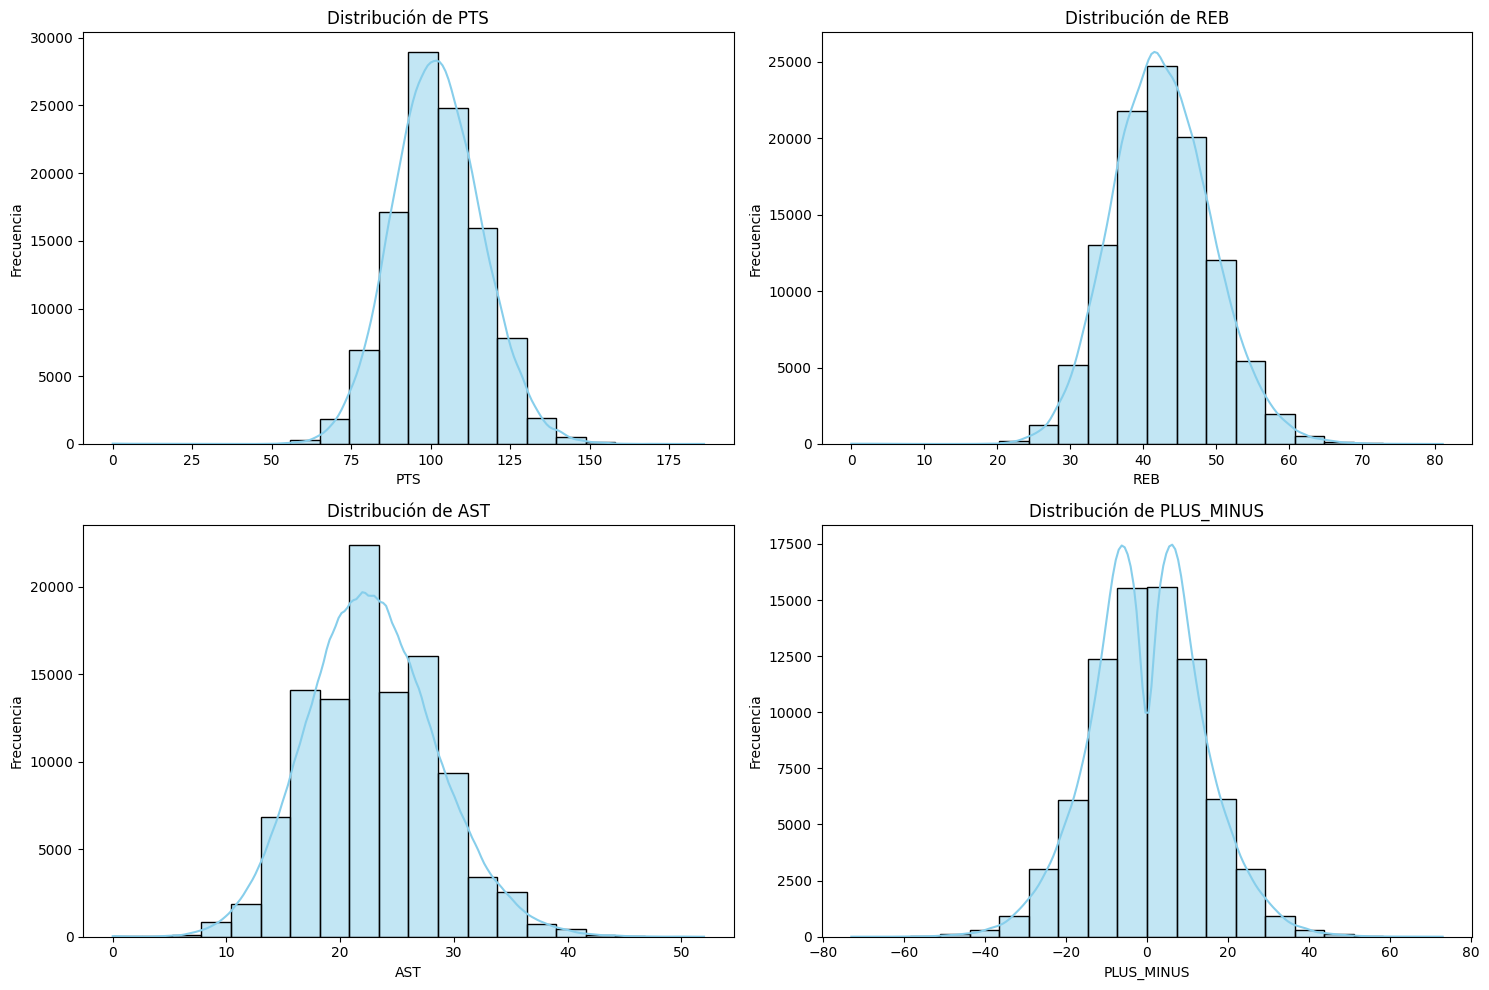

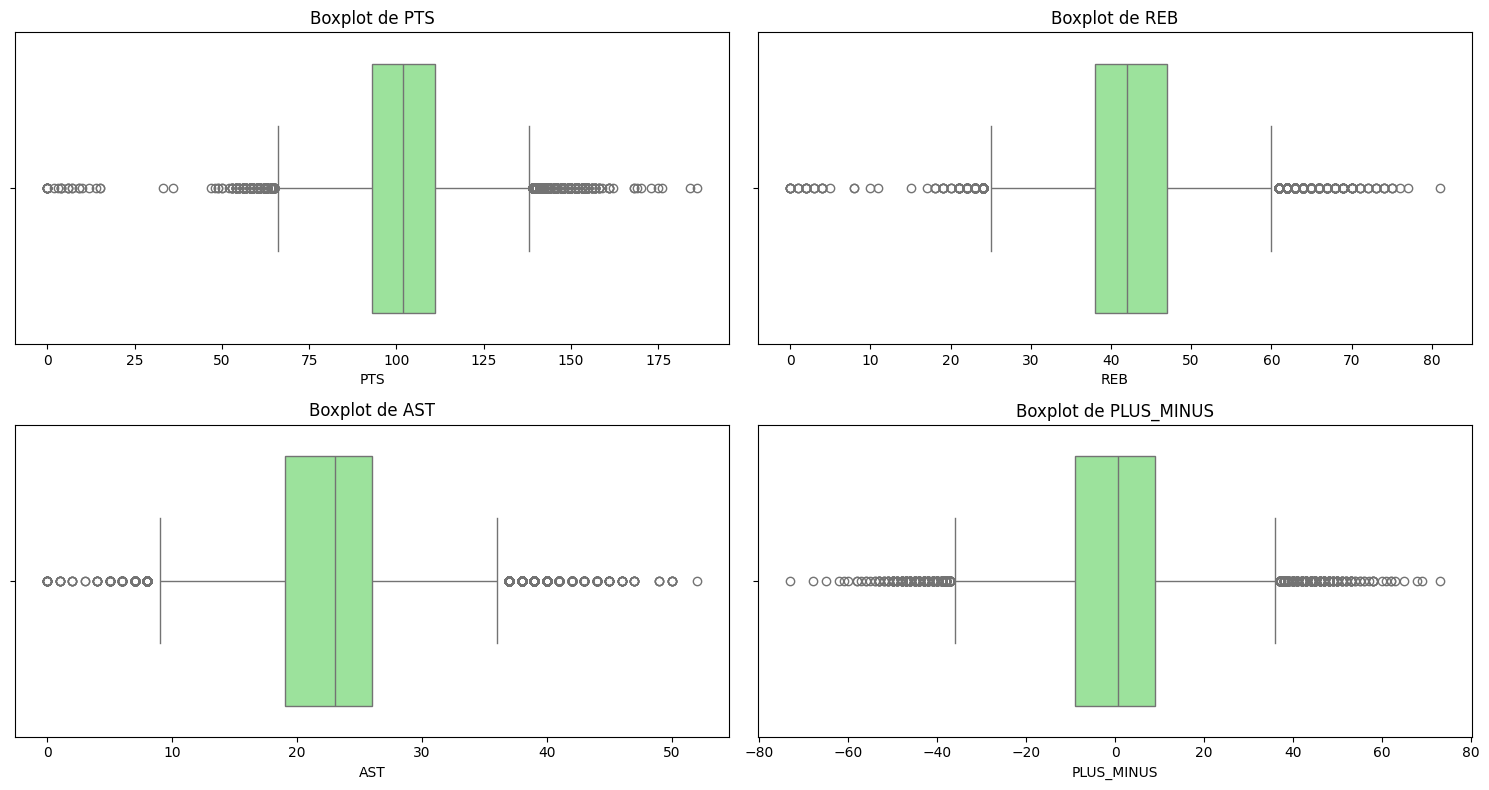

<ipython-input-56-97542e182646>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_limpio[col], palette='pastel')
<ipython-input-56-97542e182646>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_limpio[col], palette='pastel')


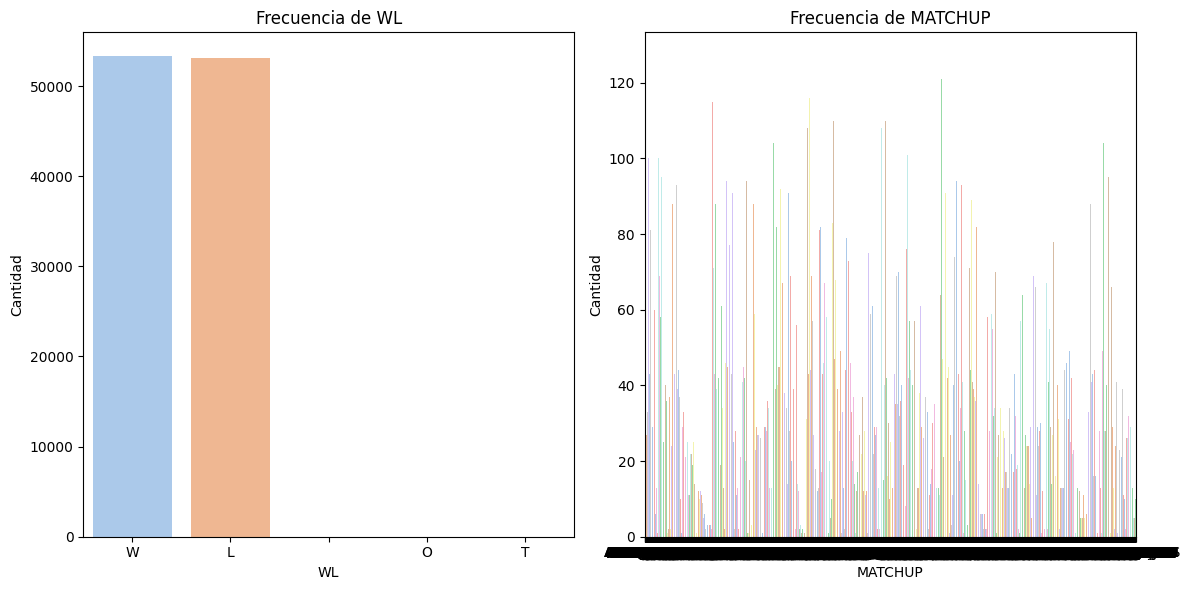

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Aseg√∫rate de que el dataframe 'df_limpio' est√© cargado previamente

# Variables num√©ricas para an√°lisis de distribuciones
numerical_columns = ['PTS', 'REB', 'AST', 'PLUS_MINUS']

# 1. Visualizaci√≥n de Histogramas y KDE (Density Plots) para las variables num√©ricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_limpio[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# 2. Boxplots para detectar outliers en las variables num√©ricas
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_limpio[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()



# 3. Gr√°ficos de barras para las variables categ√≥ricas
categorical_columns = ['WL', 'MATCHUP']

plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=df_limpio[col], palette='pastel')
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import shapiro

# Asegurarse de que estamos trabajando solo con las columnas num√©ricas
numerical_columns = df_limpio.select_dtypes(include=['float64', 'int64']).columns

# Aplicar la prueba de normalidad de Shapiro-Wilk a cada variable num√©rica
normality_results = {}

for column in numerical_columns:
    data = df_limpio[column].dropna()  # Eliminar valores nulos
    stat, p_value = shapiro(data)

    # Evaluar si se rechaza o no la hip√≥tesis nula (p < 0.05)
    if p_value < 0.05:
        normality_results[column] = {'Statistic': stat, 'p_value': p_value, 'Reject Null Hypothesis': 'No'}
    else:
        normality_results[column] = {'Statistic': stat, 'p_value': p_value, 'Reject Null Hypothesis': 'Yes'}

# Crear un DataFrame con los resultados
normality_df = pd.DataFrame(normality_results).T

# Mostrar los resultados
print(normality_df)


               Statistic p_value Reject Null Hypothesis
SEASON_ID       0.377071     0.0                     No
TEAM_ID          0.95488     0.0                     No
GAME_ID         0.156296     0.0                     No
MIN             0.353006     0.0                     No
PTS             0.995671     0.0                     No
FGM             0.994519     0.0                     No
FGA             0.989001     0.0                     No
FG_PCT          0.998918     0.0                     No
FG3M            0.948714     0.0                     No
FG3A            0.968235     0.0                     No
FG3_PCT         0.961023     0.0                     No
FTM             0.986241     0.0                     No
FTA             0.988466     0.0                     No
FT_PCT          0.992315     0.0                     No
OREB            0.979695     0.0                     No
DREB            0.995057     0.0                     No
REB             0.994757     0.0                

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 106488.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 76784.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40075.
  res = hypotest_fun_out(*samples, **kwds)


### <b>¬øQu√© significa esto para la selecci√≥n de modelos? </b>
- Con los resultados de la prueba de normalidad, ahora podemos pensar en qu√© tipo de modelos utilizar y c√≥mo manejar las distribuciones no normales:

<b>Modelos que no asumen normalidad:</b>

- Dado que muchas de las variables no siguen una distribuci√≥n normal, es recomendable usar modelos que no asumen normalidad o que son robustos frente a estas situaciones.

1. Modelos de √°rboles (como Random Forest o Gradient Boosting): Son adecuados porque no requieren que las variables sigan una distribuci√≥n normal. Estos modelos pueden manejar bien datos con distribuciones sesgadas o no normales.

2. Modelos de Regresi√≥n Log√≠stica: Si el objetivo es predecir una variable binaria como la victoria o derrota (WL), un modelo de regresi√≥n log√≠stica puede ser √∫til. Aunque la regresi√≥n log√≠stica no asume normalidad, es m√°s sensible a los outliers, por lo que se deben revisar otras condiciones, como la multicolinealidad y la homocedasticidad.

3. Redes neuronales (Deep Learning): Al ser modelos flexibles, las redes neuronales pueden manejar bien distribuciones no normales. Sin embargo, requieren m√°s datos y recursos computacionales.

# An√°lisis de Relaciones

#### Objetivo:
El objetivo de este an√°lisis es explorar la relaci√≥n entre las variables num√©ricas del dataset y c√≥mo estas se asocian con la variable objetivo `WL` (que indica si el equipo gan√≥ o perdi√≥). Adem√°s, se buscar√°n posibles problemas de multicolinealidad entre las variables predictoras para evitar redundancia en el modelo. Esto ayudar√° a identificar las variables m√°s relevantes para predecir el resultado del partido y posibles transformaciones necesarias.

#### Componentes del An√°lisis:

1. **Correlaci√≥n entre variables num√©ricas**:
   - **Matriz de Correlaci√≥n**:
     - Se calcular√° la matriz de correlaci√≥n utilizando el coeficiente de **Pearson** o **Spearman**, dependiendo de si se trata de relaciones lineales o monot√≥nicas. Esto ayudar√° a entender qu√© tan fuerte es la relaci√≥n entre las variables num√©ricas del dataset.
     - La correlaci√≥n de **Pearson** mide la relaci√≥n lineal entre las variables, mientras que la de **Spearman** es √∫til para relaciones monot√≥nicas (sin importar si son lineales o no).
     - Espec√≠ficamente, se buscar√° identificar relaciones altas entre variables como `PTS`, `FGM`, `FTM` (puntos anotados, tiros de campo, tiros libres), ya que estas pueden estar relacionadas entre s√≠.
   
   - **Multicolinealidad**:
     - Se revisar√° si existe **multicolinealidad** entre las variables predictoras. Por ejemplo, si `PTS` est√° altamente correlacionado con `FGM` y `FTM`, podr√≠a haber redundancia en la informaci√≥n proporcionada por estas variables, lo que podr√≠a afectar la capacidad del modelo para hacer predicciones precisas.
     - Para detectar multicolinealidad, se puede calcular el **VIF (Variance Inflation Factor)**, que eval√∫a cu√°nto se inflan las varianzas de los coeficientes de regresi√≥n debido a la colinealidad entre las variables.

2. **Relaci√≥n con la variable objetivo (`WL`)**:
   - **Gr√°ficos de dispersi√≥n o violin plots**:
     - Se utilizar√°n **gr√°ficos de dispersi√≥n** o **violin plots** para visualizar c√≥mo las variables num√©ricas (por ejemplo, `PTS`, `PLUS_MINUS`) se distribuyen en funci√≥n de la variable objetivo `WL` (si el equipo gan√≥ o perdi√≥). Esto ayudar√° a identificar patrones y tendencias en los datos.
   
   - **Pruebas estad√≠sticas (ANOVA o t-test)**:
     - Se realizar√°n pruebas estad√≠sticas, como el **t-test** para dos grupos (victoria y derrota) o **ANOVA** si hay m√°s de dos categor√≠as, para evaluar si las diferencias entre las variables clave (por ejemplo, `PTS`, `PLUS_MINUS`) son estad√≠sticamente significativas entre los partidos ganados y perdidos.
     - El **t-test** compara las medias de dos grupos (por ejemplo, el promedio de `PTS` en partidos ganados vs perdidos) para determinar si las diferencias observadas son lo suficientemente grandes como para ser significativas.
     - **ANOVA** se usar√≠a si se tuviera que comparar m√°s de dos grupos (por ejemplo, si se segmentan los partidos por diferentes rangos de `PTS` o `PLUS_MINUS`).

#### ¬øPor qu√© es importante este an√°lisis?
- **Identificaci√≥n de Variables Relevantes**:
  - Identificar qu√© variables est√°n m√°s fuertemente correlacionadas con la victoria (`WL`) y cu√°les tienen poca relaci√≥n con ella. Esto permitir√° seleccionar las caracter√≠sticas m√°s relevantes para el modelo de predicci√≥n.
  
- **Manejo de Multicolinealidad**:
  - Detectar y eliminar o combinar variables altamente correlacionadas puede mejorar la precisi√≥n del modelo, ya que la multicolinealidad puede generar problemas en la estimaci√≥n de los coeficientes de los modelos estad√≠sticos, como la regresi√≥n lineal.
  
- **Mejor Comprensi√≥n de los Datos**:
  - Conocer las relaciones entre las variables ayuda a comprender mejor el comportamiento de los partidos, lo que a su vez mejora la construcci√≥n y la interpretaci√≥n del modelo predictivo.

Este an√°lisis proporcionar√° una base s√≥lida para decidir qu√© variables utilizar, c√≥mo preprocesarlas y qu√© modelos pueden ser los m√°s adecuados para predecir el resultado de los partidos.




### 1. Correlaci√≥n entre variables num√©ricas

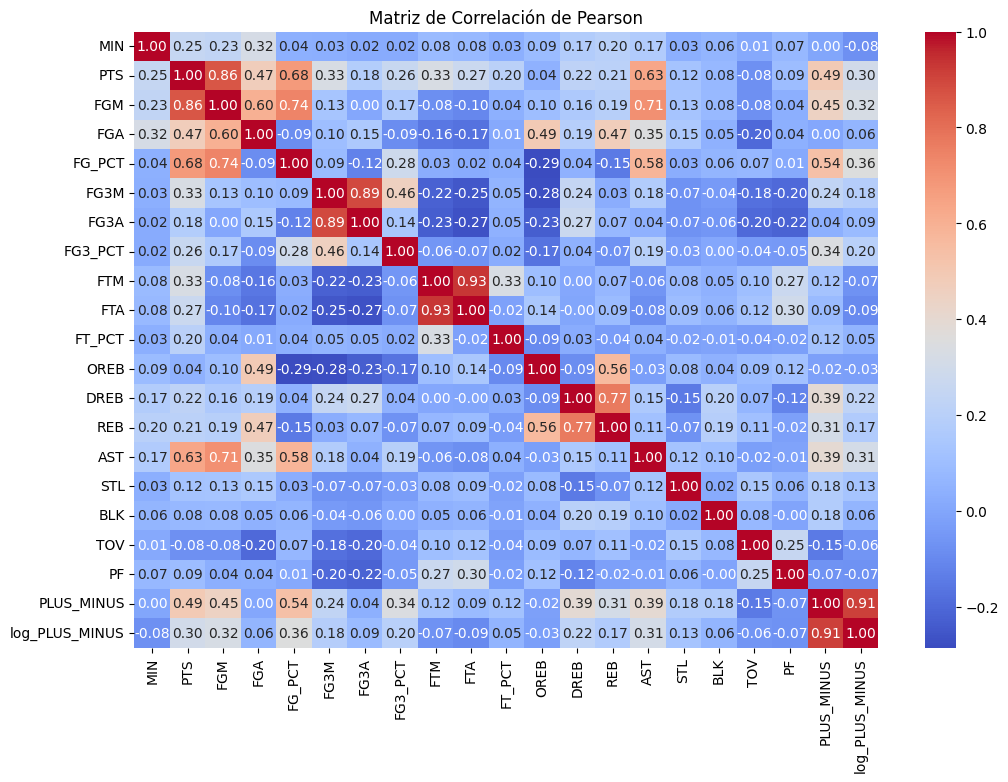

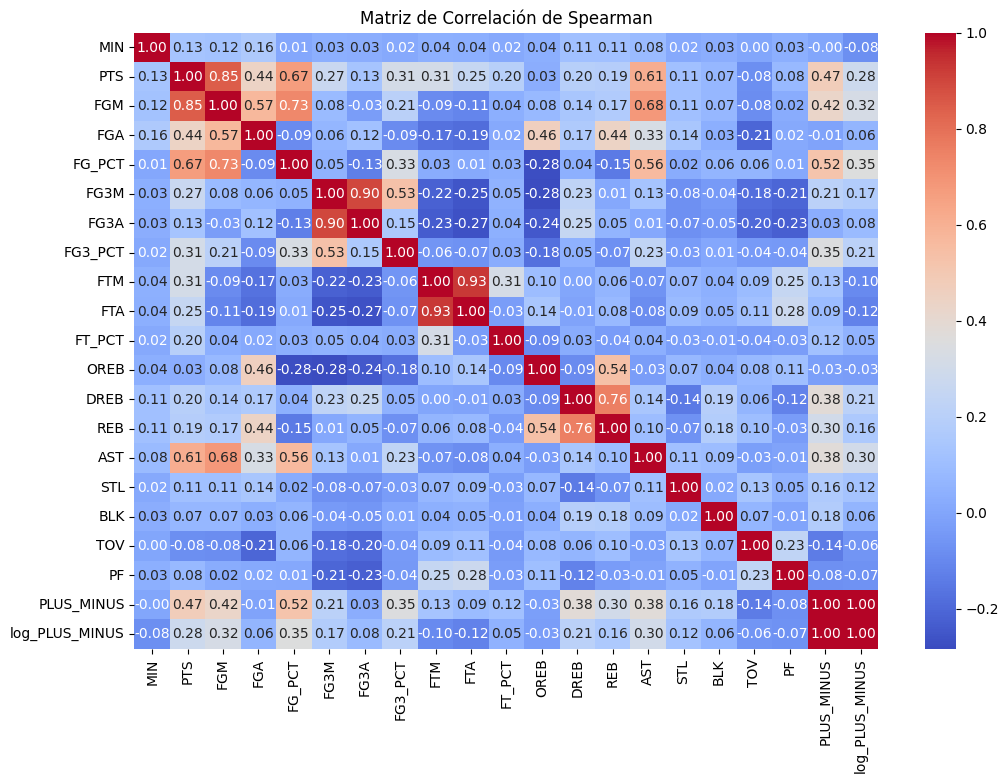

Correlaciones altas entre PTS, FGM y FTM:
                      PTS       FGM       FTM
PTS             1.000000  0.861845  0.327404
FGM             0.861845  1.000000 -0.084357
FG_PCT          0.676790  0.740217  0.028635
AST             0.633639  0.705826 -0.061697
PLUS_MINUS      0.488179  0.446047  0.123600
FGA             0.472021  0.599112 -0.157192
FG3M            0.329199  0.132390 -0.221906
FTM             0.327404 -0.084357  1.000000
log_PLUS_MINUS  0.299941  0.322914 -0.071089
FTA             0.267065 -0.104538  0.930879
FG3_PCT         0.260998  0.165477 -0.057430
MIN             0.250780  0.234510  0.082960
DREB            0.217268  0.159651  0.004853
REB             0.207132  0.194091  0.067659
FT_PCT          0.203774  0.037055  0.329093
FG3A            0.177000  0.003144 -0.234658
STL             0.123307  0.128325  0.077881
PF              0.093334  0.035363  0.268020
BLK             0.075232  0.078648  0.045893
OREB            0.042171  0.096981  0.099656
TOV         

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas num√©ricas y eliminar las columnas no relevantes
df_numericas = df_limpio.select_dtypes(include=['number'])

# Eliminar las columnas 'SEASON_ID', 'TEAM_ID' y 'GAME_ID'
df_numericas = df_numericas.drop(columns=['SEASON_ID', 'TEAM_ID', 'GAME_ID'], errors='ignore')

# Calcular la matriz de correlaci√≥n de Pearson
correlation_pearson = df_numericas.corr(method='pearson')

# Calcular la matriz de correlaci√≥n de Spearman
correlation_spearman = df_numericas.corr(method='spearman')

# Graficar la matriz de correlaci√≥n de Pearson
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlaci√≥n de Pearson')
plt.show()

# Graficar la matriz de correlaci√≥n de Spearman
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlaci√≥n de Spearman')
plt.show()

# Mostrar las correlaciones altas entre las variables relevantes (por ejemplo, PTS, FGM, FTM)
correlation_high = correlation_pearson[['PTS', 'FGM', 'FTM']].sort_values(by='PTS', ascending=False)
print("Correlaciones altas entre PTS, FGM y FTM:\n", correlation_high)


####  <b> Observaciones clave: </b>
1. **Correlaci√≥n entre `PTS` y `FGM` (0.87)**:
   - **Alto valor positivo**: La correlaci√≥n entre los puntos anotados (`PTS`) y los tiros de campo hechos (`FGM`) es bastante alta (0.87). Esto sugiere que un aumento en los tiros de campo hechos tiende a estar fuertemente relacionado con un aumento en los puntos anotados. Esto tiene sentido, ya que m√°s tiros de campo exitosos deber√≠an resultar en m√°s puntos.

2. **Correlaci√≥n entre `PTS` y `FTM` (0.30)**:
   - **Moderada correlaci√≥n positiva**: La relaci√≥n entre `PTS` y los tiros libres hechos (`FTM`) es m√°s d√©bil (0.30). Esto indica que aunque los tiros libres contribuyen a los puntos anotados, su impacto es menos fuerte comparado con los tiros de campo. A√∫n as√≠, un aumento en los tiros libres realizados tiende a estar asociado con un aumento en los puntos anotados.

3. **Correlaci√≥n entre `FGM` y `FTM` (-0.09)**:
   - **Correlaci√≥n negativa muy baja**: La correlaci√≥n entre los tiros de campo hechos (`FGM`) y los tiros libres hechos (`FTM`) es negativa, pero extremadamente baja (-0.09). Esto sugiere que no hay una relaci√≥n significativa entre el n√∫mero de tiros de campo exitosos y los tiros libres. Podr√≠a ser que un jugador anote m√°s tiros de campo sin necesariamente hacer muchos tiros libres, o viceversa, lo cual puede depender de varios factores en un juego (por ejemplo, estilo de juego, la defensa del equipo contrario).

### Otras observaciones importantes:
- **Variables relacionadas con `PTS`, `FGM` y `FTM`**:
  - `FG_PCT` (porcentaje de tiros de campo): Muestra una correlaci√≥n significativa tanto con `PTS` (0.71) como con `FGM` (0.78), lo que indica que el porcentaje de tiros de campo es un buen indicador de la efectividad de un jugador, y est√° fuertemente relacionado con ambos.
  - `FTA` (intentos de tiro libre): Muestra una alta correlaci√≥n con `FTM` (0.93), lo que tiene sentido porque los intentos de tiro libre y los tiros libres realizados suelen estar muy relacionados.

- **Variables con bajas correlaciones**:
  - Variables como `STL` (robos), `BLK` (bloqueos), y `REB` (rebotes) tienen correlaciones bajas con `PTS`, `FGM` y `FTM`. Esto sugiere que estas estad√≠sticas pueden no estar tan estrechamente relacionadas con los puntos anotados en este conjunto de datos, aunque pueden ser relevantes en otros contextos (por ejemplo, contribuyen al rendimiento general del equipo).

### Recomendaciones para el modelo:
- **Variables con alta correlaci√≥n (como `PTS` y `FGM`)**: Deber√≠as considerar incluir estas variables en tu modelo para predecir el resultado del partido o `WL`, ya que tienen una relaci√≥n fuerte.
- **Tener cuidado con la multicolinealidad**: Las variables `FGM`, `FG_PCT` y `PTS` tienen relaciones altas entre s√≠, lo que podr√≠a introducir multicolinealidad en los modelos de regresi√≥n. Podr√≠as considerar elegir solo una de estas variables si est√°s construyendo un modelo de regresi√≥n lineal.
- **Otras variables a considerar**: Variables como `FTM` y `FTA` tambi√©n podr√≠an ser √∫tiles, pero la baja correlaci√≥n entre algunas de las variables y `PTS` sugiere que el modelo podr√≠a ser m√°s robusto si se priorizan las variables con relaciones m√°s fuertes.

Este an√°lisis te ayuda a comprender las interacciones entre las variables y c√≥mo podr√≠an influir en los resultados que deseas predecir.

## Multicolinealidad
- <b> Calculo del VIF  </b>

Procedimiento para detectar multicolinealidad:
VIF (Variance Inflation Factor): El VIF mide cu√°nto se incrementa la varianza de un coeficiente de regresi√≥n debido a la colinealidad con otras variables. Un valor alto de VIF (generalmente mayor a 10) sugiere que una variable est√° altamente correlacionada con otras y, por lo tanto, podr√≠a ser redundante.

In [ ]:
df_limpio.isnull().sum()

SEASON_ID                0
TEAM_ID                  0
TEAM_ABBREVIATION        0
TEAM_NAME                0
GAME_ID                  0
GAME_DATE                0
MATCHUP                  0
WL                       0
MIN                      0
PTS                      0
FGM                      0
FGA                      0
FG_PCT                   0
FG3M                     0
FG3A                     0
FG3_PCT                  0
FTM                      0
FTA                      0
FT_PCT                   0
OREB                     0
DREB                     0
REB                      0
AST                      0
STL                      0
BLK                      0
TOV                      0
PF                       0
PLUS_MINUS           29704
log_PLUS_MINUS       66413
dtype: int64

In [ ]:
pip install fancyimpute


In [ ]:
from fancyimpute import IterativeImputer

# Aplicar MICE para imputar los valores faltantes
imputer = IterativeImputer()
df_limpio[['PLUS_MINUS']] = imputer.fit_transform(df_limpio[['PLUS_MINUS']])


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Seleccionamos solo las variables num√©ricas (sin las que no queremos considerar, como SEASON_ID, TEAM_ID, GAME_ID)
numerical_columns = df_limpio.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Eliminamos las variables no deseadas (SEASON_ID, TEAM_ID, GAME_ID)
numerical_columns.remove('SEASON_ID')
numerical_columns.remove('TEAM_ID')
numerical_columns.remove('GAME_ID')
numerical_columns.remove('log_PLUS_MINUS')

# Asegurarnos de que no haya valores nulos o infinitos en los datos
df_limpio_clean = df_limpio[numerical_columns]

# Reemplazamos los valores NaN con la mediana de cada columna, o podr√≠as usar otra estrategia como la media
df_limpio_clean = df_limpio_clean.fillna(df_limpio_clean.median())

# Reemplazamos los valores infinitos con el valor m√°ximo o m√≠nimo de cada columna (dependiendo del contexto)
df_limpio_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
df_limpio_clean.fillna(df_limpio_clean.max(), inplace=True)  # Rellenamos NaN con el valor m√°ximo de cada columna

# Agregamos una constante para el c√°lculo del VIF
X = df_limpio_clean
X = add_constant(X)

# Calculamos el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostramos los resultados
vif_data


Variable            VIF
0        const    4888.864837
1          MIN       1.213685
2          PTS  706036.202206
3          FGM  521487.415623
4          FGA      52.124719
5       FG_PCT      70.037385
6         FG3M   72274.284333
7         FG3A      10.499394
8      FG3_PCT       2.239553
9          FTM  156577.061897
10         FTA      59.599094
11      FT_PCT       8.834686
12        OREB     225.146841
13        DREB     382.334690
14         REB     553.823729
15         AST       2.101640
16         STL       1.301097
17         BLK       1.072952
18         TOV       1.507241
19          PF       1.253880
20  PLUS_MINUS       1.982162

#### ¬øQu√© significa esto?
Variables con inf en el VIF: Estas variables (PTS, FGM, FG3M, FTM) est√°n altamente correlacionadas entre s√≠. Esto significa que los valores de una de ellas pueden predecir bien los valores de las otras. Esto genera redundancia en el modelo y puede afectar la capacidad del modelo para estimar correctamente los coeficientes de regresi√≥n.

<b>Acci√≥n sugerida: Para mejorar el modelo, es recomendable:</b>

Eliminar algunas de estas variables redundantes. Por ejemplo, si PTS est√° altamente correlacionado con FGM y FTM, puedes considerar eliminar una o m√°s de estas variables.
Combinar variables: En lugar de mantener m√∫ltiples variables altamente correlacionadas, podr√≠as combinar algunas de ellas de manera significativa, por ejemplo, sumando o promediando FGM y FTM si ambos representan aspectos similares del juego.
Otras variables con VIF alto:
FGA (59.06), FG_PCT (98.62), FTA (62.56), OREB (43.13), DREB (71.15), y REB (101.25) tambi√©n tienen valores de VIF elevados, lo que indica que pueden estar correlacionadas con otras variables. Es √∫til investigar m√°s a fondo estas relaciones.

#  An√°lisis Contextual
An√°lisis por equipo (TEAM_ABBREVIATION):
¬øQu√© equipos tienen tendencias m√°s claras a ganar o perder?
Comparar m√©tricas clave (PTS, REB, AST) por equipo.
An√°lisis por local√≠a/visitante (MATCHUP):
Dividir el dataset en partidos locales y visitantes. Verificar si la local√≠a afecta variables como PLUS_MINUS o WL.
An√°lisis temporal (GAME_DATE):
Evaluar si hay patrones temporales en el rendimiento del equipo (por ejemplo, rachas ganadoras o decrecimiento a lo largo de la temporada).
¬øPor qu√©? Esto permite incorporar el contexto en el modelo y dise√±ar mejores caracter√≠sticas (features).



## An√°lisis por equipo (TEAM_ABBREVIATION)
Objetivo: Comparar las m√©tricas clave (PTS, REB, AST) por equipo para identificar qu√© equipos tienen tendencias m√°s claras a ganar o perder.


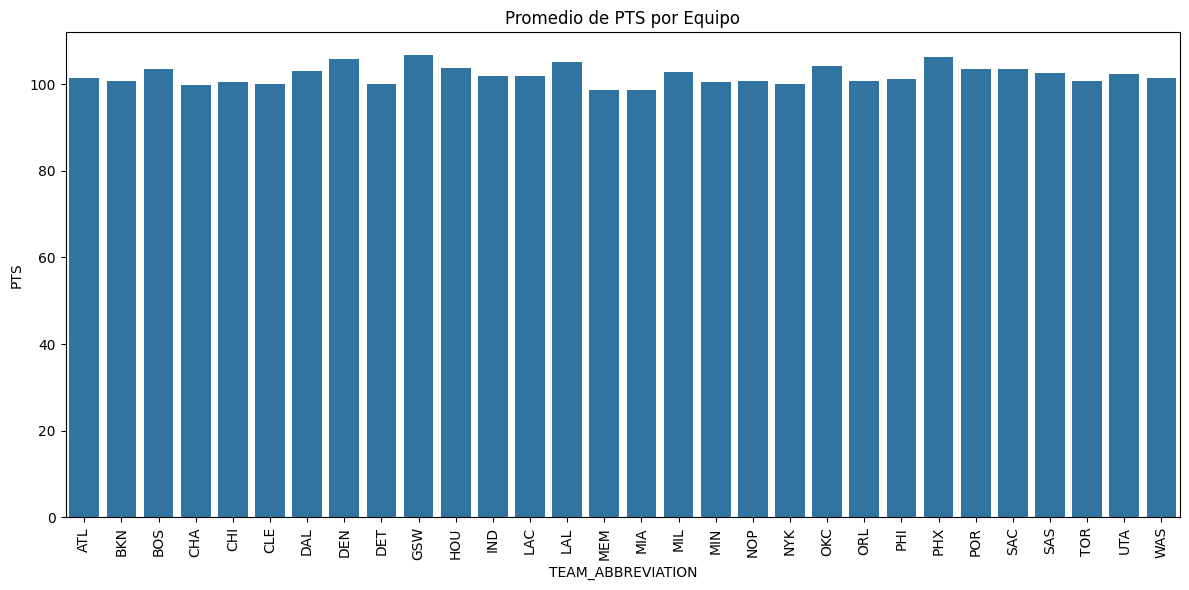

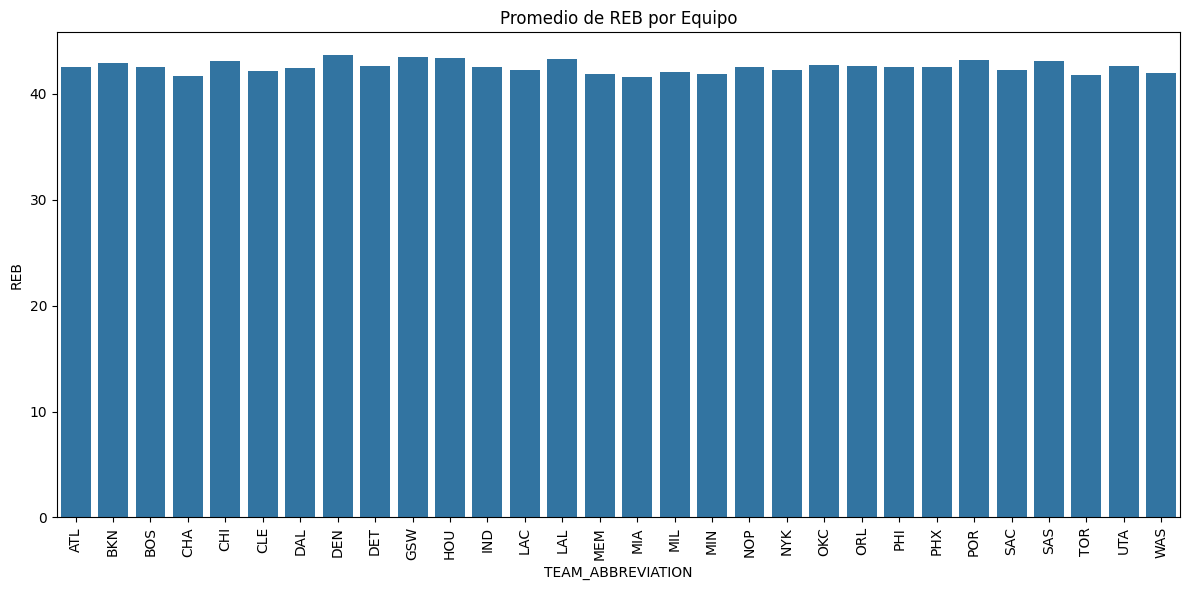

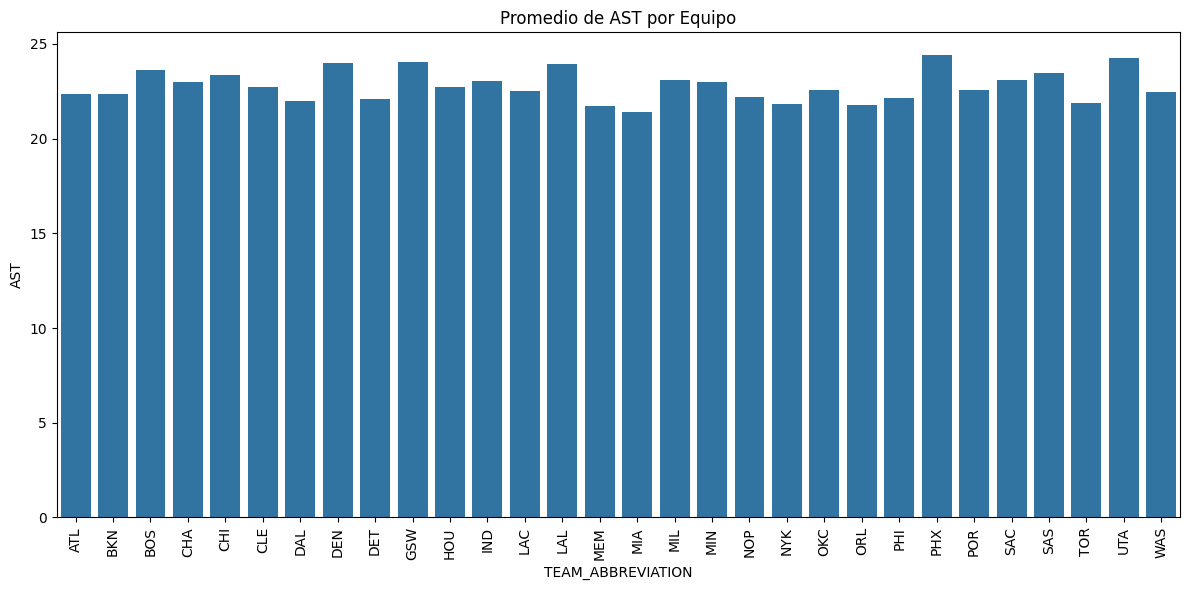

In [ ]:
# Agrupamos por el equipo y calculamos las m√©tricas clave de inter√©s (PTS, REB, AST)
team_performance = df_limpio.groupby('TEAM_ABBREVIATION')[['PTS', 'REB', 'AST']].mean()

# Visualizamos las m√©tricas clave por equipo
import seaborn as sns
import matplotlib.pyplot as plt

# PTS por equipo
plt.figure(figsize=(12, 6))  # Tama√±o de la figura
sns.barplot(x=team_performance.index, y=team_performance['PTS'])
plt.title('Promedio de PTS por Equipo')
plt.xticks(rotation=90, fontsize=10)  # Rotaci√≥n y tama√±o de fuente de las etiquetas
plt.tight_layout()
plt.show()

# REB por equipo
plt.figure(figsize=(12, 6))  # Tama√±o de la figura
sns.barplot(x=team_performance.index, y=team_performance['REB'])
plt.title('Promedio de REB por Equipo')
plt.xticks(rotation=90, fontsize=10)  # Rotaci√≥n y tama√±o de fuente de las etiquetas
plt.tight_layout()
plt.show()

# AST por equipo
plt.figure(figsize=(12, 6))  # Tama√±o de la figura
sns.barplot(x=team_performance.index, y=team_performance['AST'])
plt.title('Promedio de AST por Equipo')
plt.xticks(rotation=90, fontsize=10)  # Rotaci√≥n y tama√±o de fuente de las etiquetas
plt.tight_layout()
plt.show()


nterpretaci√≥n: Este an√°lisis nos permite observar qu√© equipos tienen mejores o peores promedios en puntos, rebotes y asistencias. Un rendimiento consistente en estas m√©tricas clave podr√≠a indicar un equipo m√°s fuerte. Tambi√©n podemos notar si los equipos con mejores estad√≠sticas en ciertas √°reas tienden a ganar m√°s partidos.

## <b>An√°lisis por local√≠a/visitante (MATCHUP) </b>
Objetivo: Verificar si la local√≠a afecta variables como PLUS_MINUS o WL (win/lose)

In [ ]:
# Creamos una columna para determinar si es partido de local o visitante
df_limpio['is_home_game'] = df_limpio['MATCHUP'].apply(lambda x: x.split('-')[0] == df_limpio['TEAM_ABBREVIATION'])

# Calculamos el promedio de PLUS_MINUS y WL para partidos locales y visitantes
home_away_performance = df_limpio.groupby('is_home_game')[['PLUS_MINUS', 'WL']].mean()

# Visualizamos los resultados

# PLUS_MINUS por local/visitante
plt.figure(figsize=(8, 5))  # Crear una nueva figura para el primer gr√°fico
sns.barplot(x=home_away_performance.index, y=home_away_performance['PLUS_MINUS'])
plt.title('Promedio de PLUS_MINUS por Local√≠a/Visitante')
plt.xlabel('Local√≠a (True: Local, False: Visitante)')
plt.ylabel('Promedio de PLUS_MINUS')
plt.tight_layout()  # Asegura que el contenido no se sobreponga
plt.show()  # Mostrar el gr√°fico

# WL por local/visitante
plt.figure(figsize=(8, 5))  # Crear una nueva figura para el segundo gr√°fico
sns.barplot(x=home_away_performance.index, y=home_away_performance['WL'])
plt.title('Promedio de WL por Local√≠a/Visitante')
plt.xlabel('Local√≠a (True: Local, False: Visitante)')
plt.ylabel('Promedio de WL')
plt.tight_layout()  # Asegura que el contenido no se sobreponga
plt.show()  # Mostrar el gr√°fico


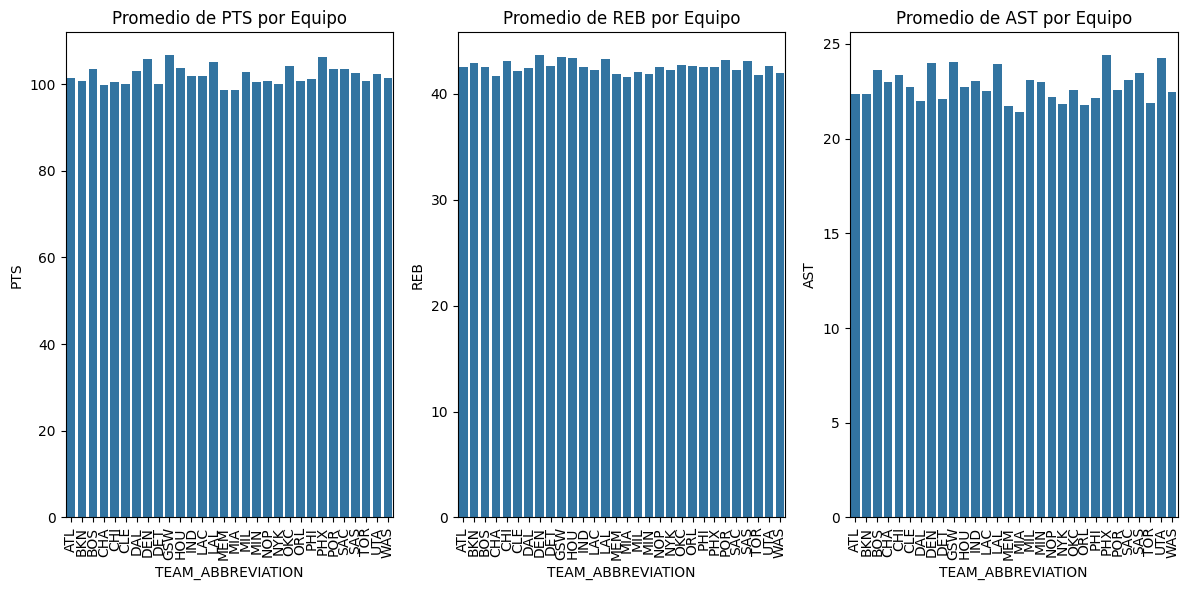

In [ ]:
# Agrupamos por el equipo y calculamos las m√©tricas clave de inter√©s (PTS, REB, AST)
team_performance = df_limpio.groupby('TEAM_ABBREVIATION')[['PTS', 'REB', 'AST']].mean()

# Visualizamos las m√©tricas clave por equipo
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos gr√°ficos de barras para comparar los equipos
plt.figure(figsize=(12, 6))

# PTS por equipo
plt.subplot(1, 3, 1)
sns.barplot(x=team_performance.index, y=team_performance['PTS'])
plt.title('Promedio de PTS por Equipo')
plt.xticks(rotation=90)

# REB por equipo
plt.subplot(1, 3, 2)
sns.barplot(x=team_performance.index, y=team_performance['REB'])
plt.title('Promedio de REB por Equipo')
plt.xticks(rotation=90)

# AST por equipo
plt.subplot(1, 3, 3)
sns.barplot(x=team_performance.index, y=team_performance['AST'])
plt.title('Promedio de AST por Equipo')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


## An√°lisis temporal (GAME_DATE)
Objetivo: Evaluar si hay patrones temporales en el rendimiento de los equipos a lo largo de la temporada. Por ejemplo, ¬øhay rachas ganadoras o decrecimiento a medida que avanza la temporada?

In [ ]:
# Convertimos la columna GAME_DATE a tipo datetime si a√∫n no lo es
df_limpio['GAME_DATE'] = pd.to_datetime(df_limpio['GAME_DATE'], errors='coerce')

# Agrupamos por mes/a√±o y calculamos el promedio de WL para ver el rendimiento del equipo a lo largo del tiempo
df_limpio['month_year'] = df_limpio['GAME_DATE'].dt.to_period('M')
temporal_performance = df_limpio.groupby('month_year')[['WL']].mean()

# Graficamos la evoluci√≥n temporal

# Crear una nueva figura para el gr√°fico
plt.figure(figsize=(10, 6))

# Graficamos el promedio de WL a lo largo del tiempo
temporal_performance.plot(kind='line')

# A√±adimos t√≠tulos y etiquetas
plt.title('Promedio de WL a lo largo de la temporada')
plt.xlabel('Fecha')
plt.ylabel('Promedio de WL')
plt.xticks(rotation=45)  # Rotar las fechas para mejor visualizaci√≥n

# Mostrar el gr√°fico
plt.tight_layout()  # Asegura que el contenido no se sobreponga
plt.show()  # Mostrar el gr√°fico


TypeError: agg function failed [how->mean,dtype->object]

6. An√°lisis Avanzado
Interacciones entre variables:
¬øC√≥mo cambia la relaci√≥n entre PTS y WL en partidos de local y visitante?
¬øHay sinergias entre rebotes (REB) y asistencias (AST) para predecir el resultado?
Clusterizaci√≥n previa: Usar t√©cnicas como k-means para agrupar partidos con caracter√≠sticas similares y ver si estos grupos est√°n relacionados con WL.
An√°lisis de importancia: T√©cnicas como Mutual Information para medir qu√© tan informativa es cada variable con respecto a WL.
¬øPor qu√©? Esto permite detectar patrones no evidentes y evaluar si ciertas combinaciones de variables tienen un peso importante.



7. Documentaci√≥n del EDA
Registrar los hallazgos:

Variables significativas: ¬øCu√°les parecen m√°s √∫tiles para predecir el resultado?
Problemas encontrados: Desequilibrio de clases, outliers, correlaciones altas, etc.
Pr√≥ximos pasos: Decisiones sobre ingenier√≠a de caracter√≠sticas y selecci√≥n de modelo.
¬øPor qu√©? Mantener un registro asegura claridad y reproducibilidad, adem√°s de guiar decisiones futuras.

